# Initialization

In [1]:
%matplotlib inline

In [2]:
from time import time

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from tools.email_preprocess import preprocess

## Load Input Data (L1-L3)

In [3]:
""" 
    This is the code to accompany the Lesson 1 (Naive Bayes) mini-project. 

    Use a Naive Bayes Classifier to identify emails by their authors
    
    authors and labels:
    Sara has label 0
    Chris has label 1
"""

### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess(path_prefix='tools')

no. of Chris training emails: 7936
no. of Sara training emails: 7884


---

# L1 - Naive Bayes

In [4]:
from sklearn.naive_bayes import GaussianNB

In [5]:
# Classify
clf = GaussianNB()
t0 = time()
clf.fit(features_train, labels_train)
print("training time: ", time() - t0)

training time:  1.728973150253296


In [6]:
# Predict
t0 = time()
pred = clf.predict(features_test)
print("prediction time: ", time() - t0)

prediction time:  0.20532608032226562


In [7]:
print("Accuracy: ", accuracy_score(labels_test, pred))

Accuracy:  0.973265073948


---

# L2 - SVM
- SVM maximizes robustness
- SVM first considers the correctness and then the margin

In [8]:
from sklearn import svm

## SVM Author ID

In [9]:
clf = svm.SVC(kernel='linear')
clf.fit(features_train, labels_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
pred = clf.predict(features_test)
accuracy_score(pred, labels_test)

0.98407281001137659

## A smaller Training Set

In [11]:
sub_features_train = features_train[:int(len(features_train)/100)] 
sub_labels_train = labels_train[:int(len(labels_train)/100)] 

In [12]:
clf = svm.SVC(kernel='linear')
clf.fit(sub_features_train, sub_labels_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
pred = clf.predict(features_test)
accuracy_score(pred, labels_test)

0.88452787258248011

## Deploy an RBF Kernel

In [14]:
clf = svm.SVC(kernel='rbf')
clf.fit(sub_features_train, sub_labels_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
pred = clf.predict(features_test)
accuracy_score(pred, labels_test)

0.61604095563139927

## Optimize C Parameter

In [16]:
def test_svm_c(values):
    max_accuracy = 0
    best_c = None
    for c in values:
        clf = svm.SVC(kernel='rbf', C=c)
        clf.fit(sub_features_train, sub_labels_train)
        pred = clf.predict(features_test)
        accuracy = accuracy_score(pred, labels_test)
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_c = c
    return (max_accuracy, best_c)

In [17]:
test_svm_c([10, 1000, 1000, 10000])

(0.89249146757679176, 10000)

## Extracting Predictions from an SVM

In [18]:
clf = svm.SVC(kernel='rbf', C=10000)
clf.fit(sub_features_train, sub_labels_train)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
test_data = [features_test[10], features_test[26], features_test[50]]

In [20]:
clf.predict(test_data)

array([1, 0, 1])

## How Many Chris Emails Predicted

In [21]:
clf = svm.SVC(kernel='rbf', C=10000)
clf.fit(features_train, labels_train)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
pred = clf.predict(features_test)

In [23]:
len(pred[pred == 1])

877

---

# L3 - Decision Tree

In [24]:
from sklearn import tree

In [25]:
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf.fit(features_train, labels_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=40, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [26]:
pred = clf.predict(features_test)
accuracy_score(pred, labels_test)

0.97895335608646183

---

# L4 - Choose Your Own Algorithm

## Setup Code

### Import Lib

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import random

### Visualize Classifier

In [28]:
# class_vis.py

def prettyPicture(clf, X_test, y_test):
    x_min, x_max = 0.0, 1.0
    y_min, y_max = 0.0, 1.0
    
    X_test_mt = np.mat(X_test)
    y_test_mt = np.array(y_test)
    # Plot the decision boundary.
    # For that, we will assign a color to each point
    # in the mesh [x_min, m_max] x [y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = X_test_mt[:, 0][y_test_mt == 0]
    bumpy_sig = X_test_mt[:, 1][y_test_mt == 0]
    grade_bkg = X_test_mt[:, 0][y_test_mt == 1]
    bumpy_bkg = X_test_mt[:, 1][y_test_mt == 1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")
    plt.show()

### Make Random Data

In [29]:
# prep_terrain_data.py

def makeTerrainData(n_points=1000):
    np.random.seed(42)
    grade = np.random.random(n_points)
    bumpy = np.random.random(n_points)
    error = np.random.random(n_points)
    
    y = np.round(grade*bumpy + 0.3 + 0.1*error)
    y[(grade > 0.8) | (bumpy > 0.8)] = 1.0

    # split into train/test sets
    X = [[g, s] for g, s in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = np.mat(X[0:split])
    X_test  = np.mat(X[split:])
    y_train = np.array(y[0:split])
    y_test  = np.array(y[split:])
    
    grade_sig = X_train[:, 0][y_train == 0]
    bumpy_sig = X_train[:, 1][y_train == 0]
    grade_bkg = X_train[:, 0][y_train == 1]
    bumpy_bkg = X_train[:, 1][y_train == 1]

    training_data = {"fast": {"grade": grade_sig, "bumpiness": bumpy_sig},
                     "slow": {"grade": grade_bkg, "bumpiness": bumpy_bkg}}
    
    grade_sig = X_test[:, 0][y_test == 0]
    bumpy_sig = X_test[:, 1][y_test == 0]
    grade_bkg = X_test[:, 0][y_test == 1]
    bumpy_bkg = X_test[:, 1][y_test == 1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig},
                 "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test

In [30]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

### Visualize Data

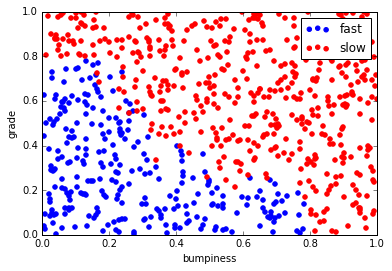

In [31]:
### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = features_train[:, 0][labels_train == 0]
bumpy_fast = features_train[:, 1][labels_train == 0]
grade_slow = features_train[:, 0][labels_train == 1]
bumpy_slow = features_train[:, 1][labels_train == 1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()

## KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(features_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
pred = clf.predict(features_test)
accuracy_score(pred, labels_test)

0.94799999999999995

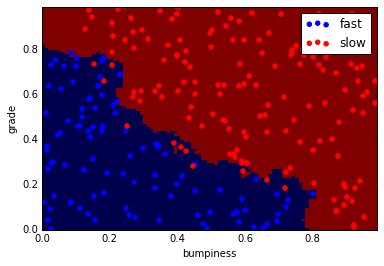

In [35]:
prettyPicture(clf, features_test, labels_test)

## Ada Boost

In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
clf = AdaBoostClassifier()
clf.fit(features_train, labels_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [38]:
pred = clf.predict(features_test)
accuracy_score(pred, labels_test)

0.95599999999999996

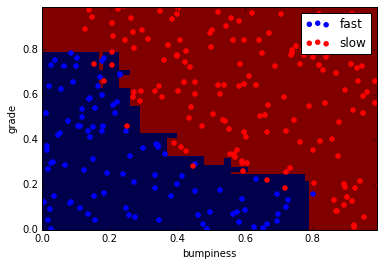

In [39]:
prettyPicture(clf, features_test, labels_test)

## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
clf = RandomForestClassifier()
clf.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
pred = clf.predict(features_test)
accuracy_score(pred, labels_test)

0.95199999999999996

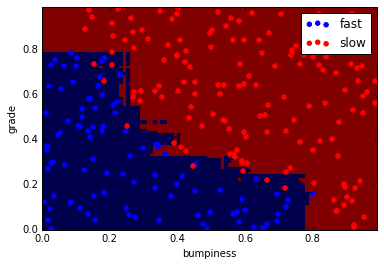

In [43]:
prettyPicture(clf, features_test, labels_test)